# 0-1 Knapsack 문제
: 용량이 W인 배낭과 무게 w인 값어치 p를 가지는 n개의 물건이 존재한다고 가정했을 때, 총 무게가 W를 넘지 않으면서 물건의 총 값어치가 최대가 되도록 물건을 배낭에 담고자 하는 문제 

- 물건들의 집합 O = {o1, o2, o3, …, on}

<br>

## ❌ Greedy Algorithm ❌
: 0-1 Knapsack 문제에 대해 항상 최적의 해를 찾는다는 것을 보장하기 위해서는 다음의 조건을 만족해야함 
- **Optimal Substructure Property ⭕️**

  : 용량이 W인 배낭과 물건들의 집합 O에 대해 물건 o1을 포함하는 최적의 최종해를 S라고 했을 때, S – {o1}이 용량 W – w1인 배낭과 O – {o1}에 대해 최적의 최종해임을 쉽게 알 수 있음

- **Greedy Choice Property ❌**

<br>

## 👉 Divide and Conquer Algorithm 

: O의 각 물건 oi를 배낭에 넣은 경우와 넣지 않은 경우로 분할하고 처리하여 통합 시 두 경우 중 더 높은 값어치를 가지는 경우를 선택

- 각 물건마다 2가지 경우가 존재하므로 O(2^n)

- P( i, w ) : 첫번째 물건부터 i번째 물건까지의 항목들만 고려해서 배낭에 넣어 얻을 수 있는 현재 최적의 누적 값어치( optimal profit )

1️⃣ 물건 oi를 배낭에 넣을 경우

: 현재 가용 배낭 용량은 이전 배낭 용량에서 줄여야 함

    P(i, w) = P(i-1, w-wi) + pi

2️⃣ 물건 oi를 배낭에 넣지 않을 경우 

    P(i, w) = P(i-1, w)

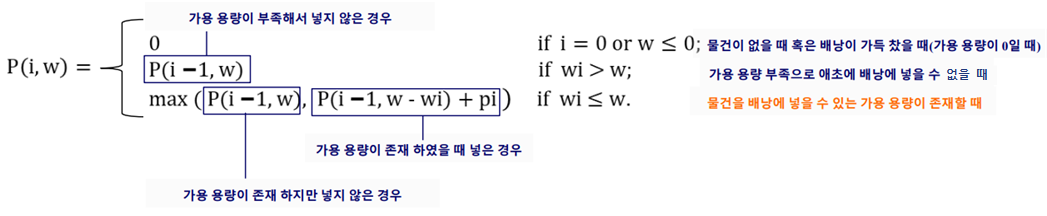

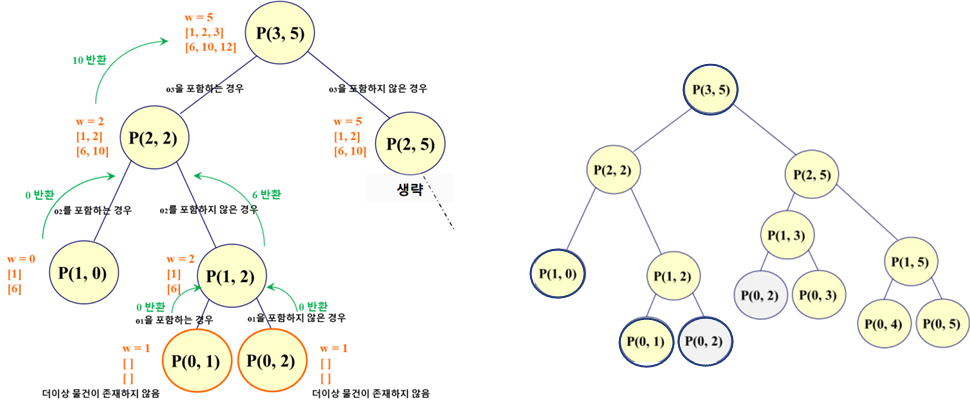

In [1]:
def dc_knapsack(W, N, p, w):
  if W==0 or N ==0 :
    return 0
  
  if (w[N-1] > W):
    return dc_knapsack(W, N-1, p, w)
  else:
    include = p[N-1] + dc_knapsack(W - w[N-1], N-1, p, w)
    exclude = dc_knapsack(W, N-1, p, w)
    return max(include, exclude)

p = [3,4,5,6]
w = [2,3,4,5]
W = 5
N = len(p)
print(dc_knapsack(W, N, p, w))

7


<br>

### **Overlapping Sub-Problem** 특성 만족

##👉 **Memoization** 



In [2]:
def memo_knapsack(W, N, p, w):
  if W==0 or N ==0 :
    return 0
  
  if cache[N][W] != -1 :
    return cache[N][W]

  if (w[N-1] > W):
    cache[N][W] = memo_knapsack(W, N-1, p, w)
    return cache[N][W]
  else:
    include = p[N-1] + memo_knapsack(W - w[N-1], N-1, p, w)
    exclude = memo_knapsack(W, N-1, p, w)
    cache[N][W] = max(include, exclude)
    return cache[N][W]

p = [3,4,5,6]
w = [2,3,4,5]
W = 5
N = len(p)
cache = [[-1]*(W+1) for i in range(0, N+1)]
print(memo_knapsack(W, N, p, w))

7


<br>

##👉 **Dynamic Programming** 

- 수행시간 분석 : O(NW)
  - 만약, W = N!이라면 O(N!)이 될 수 있음

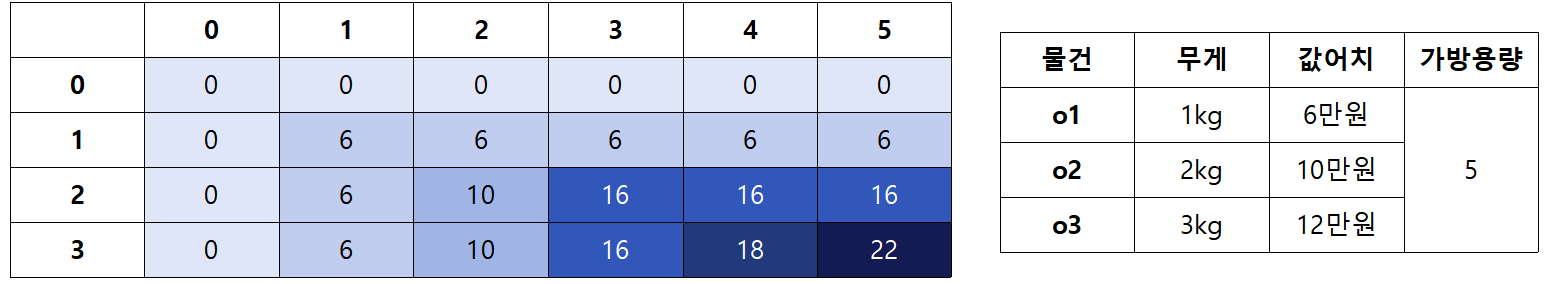

In [3]:
def dp_knapsack(W, N, p, w):
  for i in range(1, N+1):
    for j in range(1, W+1):
      if (w[i-1] > j):
        cache[i][j] = cache[i-1][j]
      else:
        include = p[i-1] + cache[i-1][j - w[i-1]]
        exclude = cache[i-1][j]
        cache[i][j] = max(include, exclude)
  return cache[N][W]
  
p = [3,4,5,6]
w = [2,3,4,5]
W = 5
N = len(p)
cache = [[0]*(W+1) for i in range(0, N+1)]
print(dp_knapsack(W, N, p, w))

7
